# Monte Carlo Zur Minimierung der Energie

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### 1. Setze die Anzahl der Teilchen und ziehe die Startpositionen

In [36]:
N=15

phi_Teilchen=np.random.rand(N)
r_Teilchen=np.random.rand(N)
x_Teilchen=r_Teilchen*np.cos(phi_Teilchen*2*np.pi)
y_Teilchen=r_Teilchen*np.sin(phi_Teilchen*2*np.pi)

Wir machen auch noch ein Bilder am Startpunkt

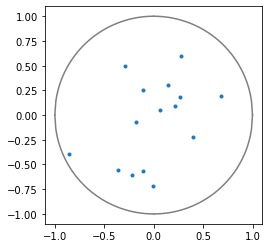

In [37]:
x_circ=np.linspace(0,1,100)
y_circ=np.sqrt(1-x_circ**2)

plt.plot(x_circ,y_circ, 'C7-')
plt.plot(-x_circ,y_circ, 'C7-')
plt.plot(x_circ,-y_circ, 'C7-')
plt.plot(-x_circ,-y_circ, 'C7-')
plt.gca().set_aspect('equal')
plt.plot(x_Teilchen, y_Teilchen, 'C0.')
plt.show()


### 2. Definition von Funktionen

In [38]:
def in_box(x,y):
    if(np.abs(x)<1 and np.abs(y)<1):
        return True
    else:
        return False

def in_circle(x, y):
    ''' hier eine Bedinging einfügen zum Überprüfen, ob das Teilchen im Kreis ist. '''
        return True
    else:
        return False
    
def energy(x,y):
    E=0
    for i in range(N):
        for j in range(N):
            if(j > i):
                ''' Hier die Energie-Formel eingeben '''
    return E

### 3. MonteCarlo Simulation

Wir werden nun alle Postitionen der Reihe nach zufällig variieren und dann schauen ob die Energei sich verringert hat. Nur dann werden wir die neue Position annehmen. 

Hier eine Schleife über die Schritte in der Monte Carlo Simulation

In [39]:
Schritte=1000*N
E_Verlauf=np.array([])
E=energy(x_Teilchen, y_Teilchen)
print(E)
E_Verlauf=np.append(E_Verlauf,E)
for i in range(Schritte):
    index=i%N
    x_Vorschlag_i=x_Teilchen[index]+np.random.normal(scale=0.05)
    y_Vorschlag_i=y_Teilchen[index]+np.random.normal(scale=0.05)
    x_Vorschlag=np.copy(x_Teilchen)
    y_Vorschlag=np.copy(y_Teilchen)
    x_Vorschlag[index]=x_Vorschlag_i
    y_Vorschlag[index]=y_Vorschlag_i
    if in_box(x_Vorschlag_i,y_Vorschlag_i):
        if in_circle(x_Vorschlag_i,y_Vorschlag_i):
            E_neu=energy(x_Vorschlag,y_Vorschlag)
            if (E_neu<E):
                E=E_neu
                x_Teilchen[index]=x_Vorschlag_i
                y_Teilchen[index]=y_Vorschlag_i
    E_Verlauf=np.append(E_Verlauf,E)
    if(i%(10*N)==0):
        print("Sweeps = {:6d} Energie = {:8.6f}".format(i//N,E))
 

209.7265159783609
Sweeps =      0 Energie = 207.269826
Sweeps =     10 Energie = 132.618939
Sweeps =     20 Energie = 115.376808
Sweeps =     30 Energie = 110.310435
Sweeps =     40 Energie = 107.637760
Sweeps =     50 Energie = 103.763296
Sweeps =     60 Energie = 102.834992
Sweeps =     70 Energie = 102.380292
Sweeps =     80 Energie = 101.972644
Sweeps =     90 Energie = 101.849020
Sweeps =    100 Energie = 101.277597
Sweeps =    110 Energie = 101.263528
Sweeps =    120 Energie = 101.150753
Sweeps =    130 Energie = 101.132223
Sweeps =    140 Energie = 101.028005
Sweeps =    150 Energie = 101.027616
Sweeps =    160 Energie = 101.018925
Sweeps =    170 Energie = 100.994164
Sweeps =    180 Energie = 100.960282
Sweeps =    190 Energie = 100.939511
Sweeps =    200 Energie = 100.925391
Sweeps =    210 Energie = 100.925391
Sweeps =    220 Energie = 100.915121
Sweeps =    230 Energie = 100.897125
Sweeps =    240 Energie = 100.868002
Sweeps =    250 Energie = 100.867380
Sweeps =    260 Ener

Schließlich noch ein Bild der Energie als Funktion der Monte Carlo Zeit und die Tailchen am Ende

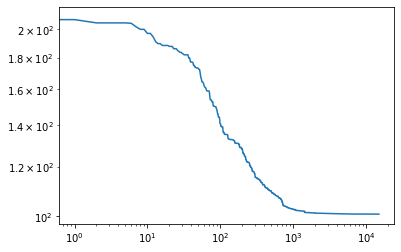

In [40]:
plt.plot(E_Verlauf)
plt.xscale('log')
plt.yscale('log')
plt.show()

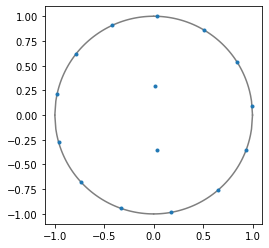

In [41]:
x_circ=np.linspace(0,1,100)
y_circ=np.sqrt(1-x_circ**2)

plt.plot(x_circ,y_circ, 'C7-')
plt.plot(-x_circ,y_circ, 'C7-')
plt.plot(x_circ,-y_circ, 'C7-')
plt.plot(-x_circ,-y_circ, 'C7-')
plt.gca().set_aspect('equal')
plt.plot(x_Teilchen, y_Teilchen, 'C0.')
plt.show()

